In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

plt.style.use("light")

# Visualizing the Wavefunction of the Hydrogen Atom

## Generalized Legendre Polynomials

In [8]:
def legendre(l, m, x):
    if l == 0:
        return x / x
    if l == 1:
        if m == 0:
            return x
        if m == 1:
            return -np.sqrt(1 - x**2)
        if m == -1:
            return 0.5 * np.sqrt(1 - x**2)
    else:
        return 1 / (l - m) * (x * (2 * l - 1) * legendre(l - 1, m, x) - (l + m - 1) * legendre(l - 2, m, x))

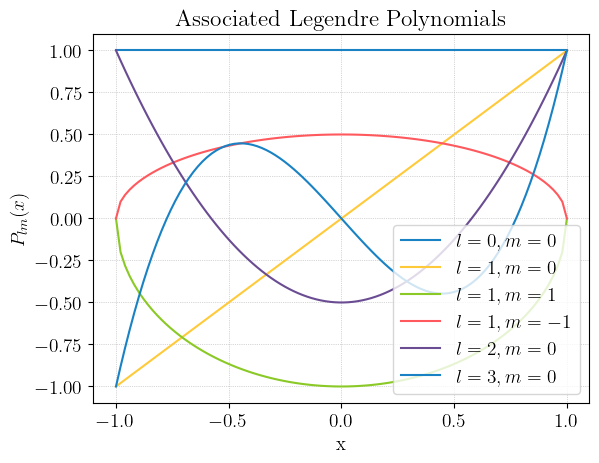

In [9]:
xlin = np.linspace(-1, 1, 100)

plt.plot(xlin, legendre(0, 0, xlin), label="$l=0, m=0$")
plt.plot(xlin, legendre(1, 0, xlin), label="$l=1, m=0$")
plt.plot(xlin, legendre(1, 1, xlin), label="$l=1, m=1$")
plt.plot(xlin, legendre(1, -1, xlin), label="$l=1, m=-1$")

plt.plot(xlin, legendre(2, 0, xlin), label="$l=2, m=0$")
plt.plot(xlin, legendre(3, 0, xlin), label="$l=3, m=0$")
plt.xlabel("x")
plt.ylabel("$P_{lm}(x)$")
plt.title("Associated Legendre Polynomials")
plt.legend()
plt.show()

## Spherical Harmonics

In [10]:
def spherical_harmonics(l, m, theta, phi):
    return (
        1
        / np.sqrt(2 * np.pi)
        * np.sqrt((2 * l + 1) / 2 * math.factorial(l - m) / math.factorial(l + m))
        * legendre(l, m, np.cos(theta))
        * np.exp(1j * m * phi)
    )

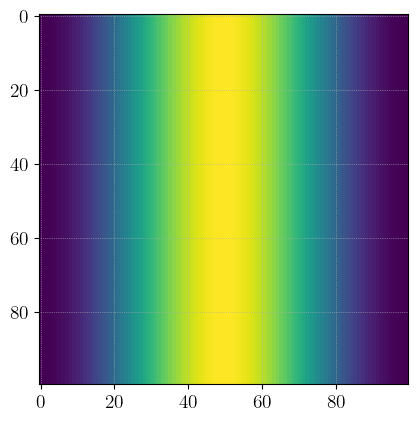

In [11]:
theta_lin = np.linspace(0, np.pi, 100)
phi_lin = np.linspace(0, 2 * np.pi, 100)

x, y = np.meshgrid(theta_lin, phi_lin)

Y = spherical_harmonics(1, 1, x, y)
plt.imshow(np.abs(Y) ** 2)

## Generalized Laguerre Polynomials

In [12]:
def laguerre(n, l, x):
    if n == 0:
        return x / x
    if n == 1:
        return -x + l + 1
    if n == 2:
        return 0.5 * (x**2 - 2 * (l + 2) * x + (l + 1) * (l + 2))
    if n == 3:
        return 1 / 6 * (-(x**3) + 3 * (l + 3) * x**2 - 3 * (l + 2) * (l + 3) * x + (l + 1) * (l + 2) * (l + 3))
    else:
        return 1 / n * ((2 * (n - 1) + 1 + l - x) * laguerre(n - 1, l, x) - (n - 1 + l) * laguerre(n - 2, l, x))

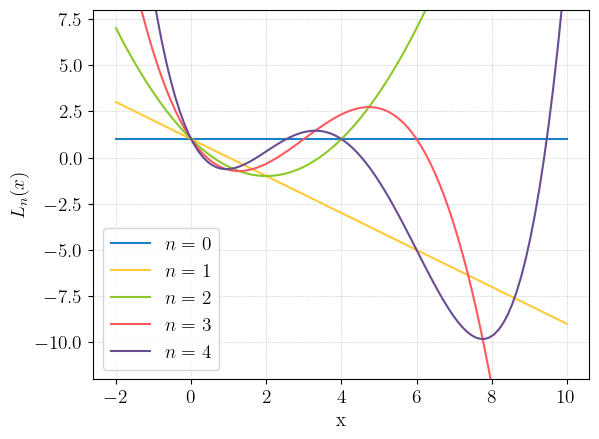

In [13]:
xlin = np.linspace(-2, 10, 100)
plt.plot(xlin, laguerre(0, 0, xlin), label="$n=0$")
plt.plot(xlin, laguerre(1, 0, xlin), label="$n=1$")
plt.plot(xlin, laguerre(2, 0, xlin), label="$n=2$")
plt.plot(xlin, laguerre(3, 0, xlin), label="$n=3$")
plt.plot(xlin, laguerre(4, 0, xlin), label="$n=4$")

plt.xlabel("x")
plt.ylabel("$L_n(x)$")
plt.legend()
plt.ylim(-12, 8)
plt.show()

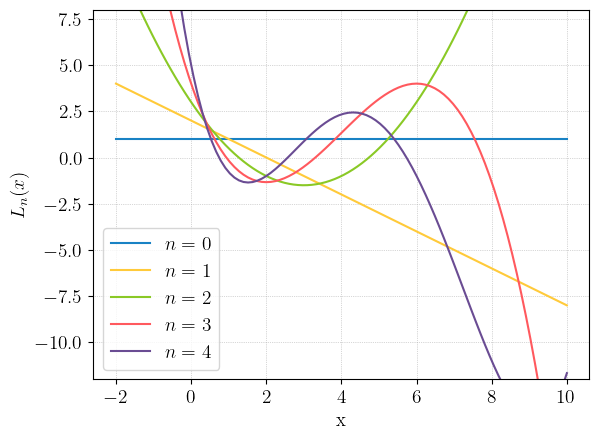

In [14]:
xlin = np.linspace(-2, 10, 100)
plt.plot(xlin, laguerre(0, 1, xlin), label="$n=0$")
plt.plot(xlin, laguerre(1, 1, xlin), label="$n=1$")
plt.plot(xlin, laguerre(2, 1, xlin), label="$n=2$")
plt.plot(xlin, laguerre(3, 1, xlin), label="$n=3$")
plt.plot(xlin, laguerre(4, 1, xlin), label="$n=4$")

plt.xlabel("x")
plt.ylabel("$L_n(x)$")
plt.legend()
plt.ylim(-12, 8)
plt.show()

## Radial Wavefunction

In [15]:
from constants import *

a_0 = 4 * np.pi * eps_0 * hbar**2 / (m_e * e**2)
Z = 1
print(a_0)


def radial_function(n, l, r):
    r_scaled = r #/ a_0
    rho = 2 * Z * r_scaled / (n * a_0)
    norm = np.sqrt((2 * Z / (n * a_0)) ** 3 * math.factorial(n - l - 1) / (2 * n * math.factorial(n + l)))
    radial = np.exp(-rho / 2) * rho**l
    laguerre_term = laguerre(n - l - 1, 2 * l + 1, rho)
    return norm * radial * laguerre_term

5.291772214784361e-11


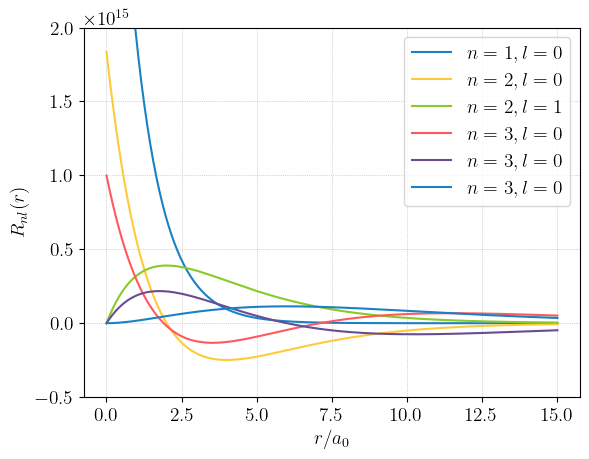

In [16]:
r_lin = np.linspace(0.001 * a_0, 15*a_0 , 300)

plt.plot(r_lin/a_0, radial_function(1, 0, r_lin), label="$n=1, l=0$")
plt.plot(r_lin/a_0, radial_function(2,0,r_lin), label="$n=2, l=0$")
plt.plot(r_lin/a_0, radial_function(2,1,r_lin), label="$n=2, l=1$")
plt.plot(r_lin/a_0, radial_function(3,0,r_lin), label="$n=3, l=0$")
plt.plot(r_lin/a_0, radial_function(3,1,r_lin), label="$n=3, l=0$")
plt.plot(r_lin/a_0, radial_function(3,2,r_lin), label="$n=3, l=0$")
plt.xlabel("$r/a_0$")
plt.ylabel("$R_{nl}(r)$")
plt.legend()
plt.hlines(0,0,15*a_0, linestyle="--", color="gray")
plt.ylim(-0.5e15,2e15)
plt.show()

## Radial Probability Density

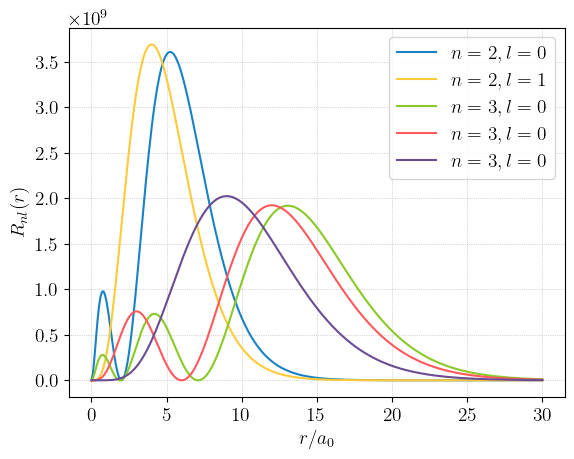

In [17]:
r_lin = np.linspace(0.001 * a_0, 30 * a_0, 300)

# plt.plot(r_lin, np.abs(radial_function(1,0,r_lin))**2, label="$n=1, l=0$")
plt.plot(r_lin/a_0, r_lin**2 * np.abs(radial_function(2, 0, r_lin)) ** 2, label="$n=2, l=0$")
plt.plot(r_lin/a_0, r_lin**2 * np.abs(radial_function(2, 1, r_lin)) ** 2, label="$n=2, l=1$")
plt.plot(r_lin/a_0, r_lin**2 * np.abs(radial_function(3, 0, r_lin)) ** 2, label="$n=3, l=0$")
plt.plot(r_lin/a_0, r_lin**2 * np.abs(radial_function(3, 1, r_lin)) ** 2, label="$n=3, l=0$")
plt.plot(r_lin/a_0, r_lin**2 * np.abs(radial_function(3, 2, r_lin)) ** 2, label="$n=3, l=0$")
plt.xlabel("$r/a_0$")
plt.ylabel("$R_{nl}(r)$")
plt.legend()
plt.hlines(0, 0, 30 * a_0, linestyle="--", color="gray")
# plt.ylim(-0.5e15,2e15)
plt.show()

In [18]:
# Check normalization
n = 2
l = 0
dr = r_lin[1] - r_lin[0]
integral = np.sum(dr * r_lin**2 * np.abs(radial_function(n, l, r_lin)) ** 2)
print(f"Integral of |R_{n}{l}(r)|^2 r^2 dr = {integral:.4f} (Expected value: 1)")

Integral of |R_20(r)|^2 r^2 dr = 1.0000 (Expected value: 1)


## Full Hydrogen Wavefunction

In [19]:
def hydrogen_wavefunction(n,l,m,r,theta,phi):
    return radial_function(n,l,r)*spherical_harmonics(l,m,theta,phi)

## Cartesian to Spherical Coordinates

In [48]:
scale = 30
samples = 64
xlin = np.linspace(-scale,scale,samples)*a_0
ylin = np.linspace(-scale,scale,samples)*a_0
zlin = np.linspace(-scale,scale,samples)*a_0

x,y,z = np.meshgrid(xlin, ylin, zlin)

r = np.sqrt(x**2+y**2+z**2)
theta = np.arccos(z/r)
phi = np.sign(y)*np.arccos(x/np.sqrt(x**2+y**2))

## Computation of Wavefunction

In [49]:
psi_100 = hydrogen_wavefunction(2,1,0,r,theta,phi)

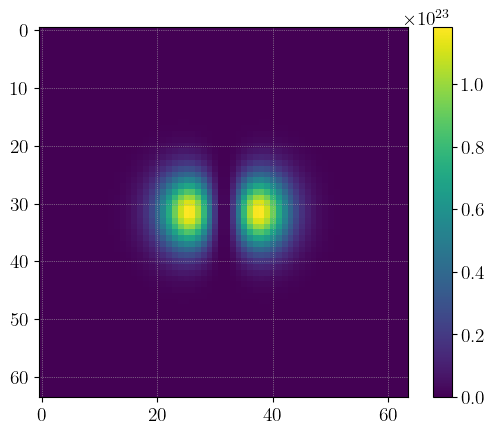

In [50]:
plt.imshow(np.abs(psi_100[:,15])**2)
plt.colorbar()

In [51]:
import pyvista as pv

def save_as_vti(dset, grad=None, origin=(0, 0, 0), spacing=(1, 1, 1), savepath="./", name="output"):
    """Save numpy 3d data array as vtkImageData for visualization in Paraview

    Args:
        dset (np.ndarray): Data array containing the scalar or vector values
        savepath (str, optional): Path where to save the .vti file. Defaults to "./".
        name (str, optional): Name of the file and dataset. Defaults to "output".

    Raises:
        NotImplementedError: Only 3D scalar or vector fields are supported right now
    """
    # Create a PyVista grid object
    if len(dset.shape) == 4:
        # If vector field
        dset = dset.transpose(1, 2, 3, 0)
        dset_flat = np.array([dset[:, :, :, i].flatten(order="F") for i in range(3)]).T
        grid = pv.ImageData(dimensions=dset.shape, origin=origin, spacing=spacing)
        grid.point_data.set_vectors(dset_flat, "01_vectors")

        if grad is not None:
            grad = grad.transpose(1, 2, 3, 0)
            grad_flat = np.array([grad[:, :, :, i].flatten(order="F") for i in range(3)]).T
            grid.point_data.set_array(grad_flat, "02_Jac")

    elif len(dset.shape) == 3:
        # If scalar field
        grid = pv.ImageData(dimensions=dset.shape, origin=origin, spacing=spacing)
        grid.point_data.set_scalars(dset.flatten(order="F"), "field")
    else:
        raise NotImplementedError()

    # Write the VTK file
    #date = print_time()
    grid.save(savepath + name + ".vti")


In [52]:
save_as_vti(np.abs(psi_100)**2, name="hydrogen")

In [56]:
def eigenenergies(n):
    return -13.6 / n**2

def superposition(n1, l1, m1, n2, l2, m2, r, theta, phi, t):
    return (
        hydrogen_wavefunction(n1, l1, m1, r, theta, phi)*np.exp(-1j*eigenenergies(n1)*t)
        + hydrogen_wavefunction(n2, l2, m2, r, theta, phi)*np.exp(-1j*eigenenergies(n2)*t)
    )
    
times = np.linspace(0, 5, 100)

for i,t in enumerate(times):
    psi = superposition(2,1,0,3,2,1, r, theta, phi, t)
    save_as_vti(np.abs(psi)**2, name=f"~/Temp/hydrogen_{i}")
